# Project: Analysis on Gun Sale Background Checks in the United States


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>For this data analysis, I have selected the dataset NICS from the FBI Gun Data section. Before a gun transaction takes place, the seller calls in on the FBI National Instant Criminal Background Check System to determine whether the gun sale to the certain individual is safe and legal. This dataset is a collection of the number of background checks and the types, specifically for gun sales and ownership, within each state in the United States from each month since 1998 to 2017. 

>    This dataset is on gun sale background checks with columns named: *month*, *state*, *permit*, *permit_recheck*, *handgun*, *long_gun*, *other*, *multiple*, *admin*, *prepawn_handgun*, *prepawn_long_gun*, *prepawn_other*, *redemption_handgun*, *redemption_long_gun*, *redemption_other*, *returned_handgun*, *returned_long_gun*, *returned_other*, *rentals_handgun*, *rentals_long_gun*, *private_sale_handgun*, *private_sale_long_gun*, *private_sale_other*, *return_to_seller_handgun*, *return_to_seller_long_gun*, *return_to_seller_other*, and *totals*. Each of these columns is linked to a unique row based on the state and date of data collection.

>    In this analysis, I will be analyzing the permit checks within each state or providence and comparing the types and number of background checks with one another. The laws on background checks for gun purchases varies in each state and private sales are not often checked in with the FBI, so not all data is fully complete. I will be exploring the total background checks by year and how seeing how much of them are from handguns. This analysis will also question the top states in total background checks and the top state in redemption background checks. This information can be very helpful to determine how seriously states take measures on performing background checks for gun transactions.


### Question(s) for Analysis
- **Question One:** What amount of the total background checks each year are from handguns?
- **Question Two:** What are the top 5 states in total background checks? How have they compared over the years?
- **Question Three:** Which state has the highest redemption rate checks on all weapons? 

In [1]:
# Importing packages to be used for analysis and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> For this section, the FBI background check data is being loaded into this notebook. The dataset will be structuralized into a readable format so it can be easily explored. I will also be cleaning the dataset by removing unnecessary data, correcting incorrect data types, and fixing any other structural problems with the dataset.

### General Properties

> The dataset is already a csv file, so I do not have to convert it. I will, however, be exploring the dataset to see what is necessary for my analysis and how the dataset can be optimized and cleaned.

In [2]:
# Data file is being read and named as a variable, then a portion of the dataset is shown.

US_gun_bchecks_data = pd.read_csv('gun_data.csv')
US_gun_bchecks_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# This displays the total number of rows and columns in this dataset.

US_gun_bchecks_data.shape

(12485, 27)

In [4]:
# Common statistical explorations of data are shown here with the describe function, 
#    such as finding the average of columns or the minimum of a column.

US_gun_bchecks_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


> Based on the data exploration above, we can see that most of the data is clean on the surface. The column names are almost all correct, besides the 'month' column which will need to be changed to 'date' since the data in the column also contains years. The size of the dataset and the statistic results will be used later for analysis and comparison.

In [5]:
# Here I am exploring the data types of each column and seeing if they correctly match.
# This section also displays if any columns are null and the amount of non-null values in each column.

US_gun_bchecks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

> In the analysis above, the month column is not in datetime format, which it will need to be converted to. The 'month' column also includes year data within it, so the column will need to be renamed to reflect that the column contains dates, not only months. Two of the columns are also incorrect data types, the 'multiple' and 'totals' columns are both integers when they should be floats. In order to gain more precision when doing statistics and exploring the dataset, float types would work best. Besides the data types, we will need to assign null values with 0 since null shows that there were unknown or no background checks called in.

### Data Cleaning

 > In this section, I converted the dataset's null values to 0 since background checks were not necessarily done on each type of transaction in every state for certain time periods. I also converted the columns 'multiple' and 'totals' to the data type float. This will allow for more precision with our analysis. The column 'month' was also converted to the data type datetime instead of the data type object and renamed to 'date', since date calculates the year and month of background checks in states.

> In the following cell, I set all of the null values equal to 0. This will help with statistical precision since background checks were not always called in for every column category and state during each month.

In [6]:
US_gun_bchecks_data.fillna(0, inplace=True)

> In the following cell, I converted the two integer column data types into integer data types. 

In [7]:
# The float type data in the dataset are converted to the integer data type.

float_columns = ['multiple','totals']
US_gun_bchecks_data[float_columns] = US_gun_bchecks_data[float_columns].astype(float)

> In the following cells, I renamed the 'month' column into 'date' since the column included both month and year data. I also converted the string object column 'month' into the data type datetime, so that my explorations and comparisons of the dataset can be more accurate.

In [8]:
# I changed the column name from 'month' to 'date' to more accurately reflect the data within the column.

US_gun_bchecks_data.rename(columns={'month':'date'},inplace=True)

In [9]:
# The column now named 'date' is converted to the data type datetime instead of string object so that the explorations
#    will be correct in comparison to one another. 

US_gun_bchecks_data['date'] = pd.to_datetime(US_gun_bchecks_data['date'])

> In the next cell, I will be dropping all of the columns that are not necessary for this analysis to clean up the dataset so that it is easier to work with.

In [10]:
# Dropping columns not needed in this analysis report.

US_gun_bchecks_data.drop(['permit_recheck','admin','prepawn_handgun','prepawn_long_gun','prepawn_other',
                          'returned_handgun','returned_long_gun','returned_other','rentals_handgun',
                         'rentals_long_gun','private_sale_handgun','private_sale_long_gun', 'private_sale_other',
                         'return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'],
                         axis=1, inplace=True)

> In this following cell, I am displaying the dataset and the changes I made in the previous cells in order to check that everything was changed accordingly.

In [11]:
# Here the dataset is checked that the above cleaning was performed correctly.

US_gun_bchecks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 12485 non-null  datetime64[ns]
 1   state                12485 non-null  object        
 2   permit               12485 non-null  float64       
 3   handgun              12485 non-null  float64       
 4   long_gun             12485 non-null  float64       
 5   other                12485 non-null  float64       
 6   multiple             12485 non-null  float64       
 7   redemption_handgun   12485 non-null  float64       
 8   redemption_long_gun  12485 non-null  float64       
 9   redemption_other     12485 non-null  float64       
 10  totals               12485 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Now that my dataset is cleaned, I will be exploring my questions. I will create a function that groups my data by certain categories so that I can easily call to the function that I will need several times in my separate question explorations. Then in the following cells, I have explored the main three questions and their variables.



### Question 1: What amount of the total background checks each year are from handguns?

> All single variables used in this question analysis from the dataset will be displayed in the cells below.

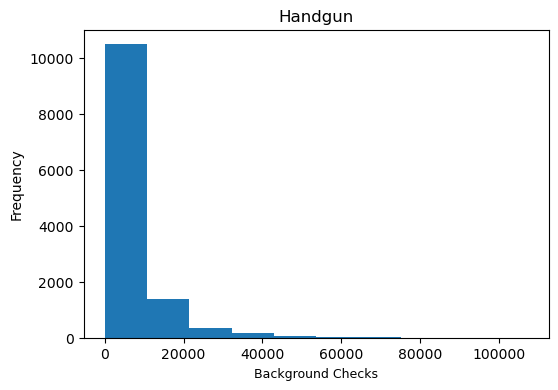

In [12]:
# Here we will explore the handgun variable in the dataset for this question.

US_gun_bchecks_data['handgun'].plot(kind='hist',figsize=(6,4))
plt.title('Handgun')
plt.xlabel('Background Checks',fontsize=9);

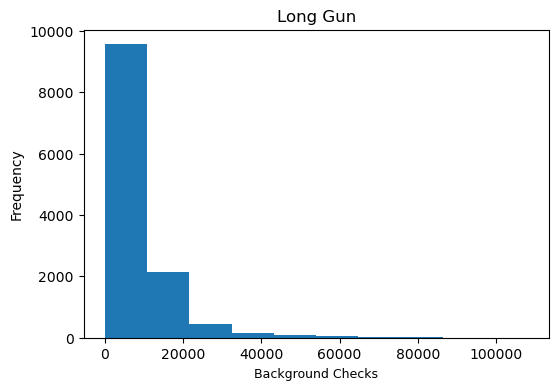

In [13]:
# Here we will explore the long gun variable in the dataset for this question.

US_gun_bchecks_data['long_gun'].plot(kind='hist',figsize=(6,4))
plt.title('Long Gun')
plt.xlabel('Background Checks',fontsize=9);

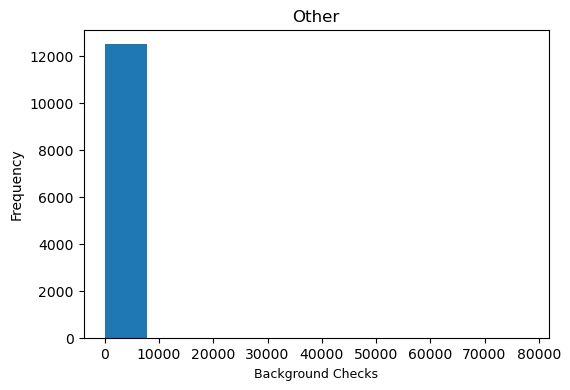

In [14]:
# Here we will explore the other variable in the dataset for this question.

US_gun_bchecks_data['other'].plot(kind='hist',figsize=(6,4))
plt.title('Other')
plt.xlabel('Background Checks',fontsize=9);

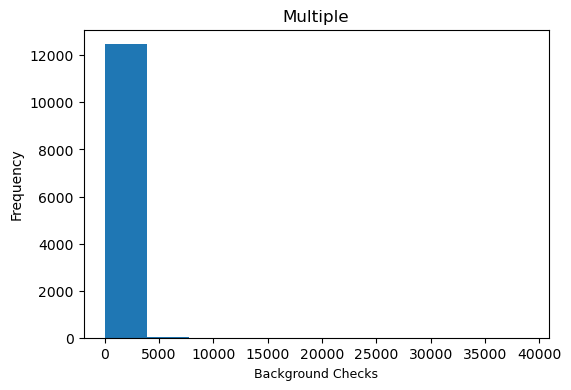

In [15]:
# Here we will explore the multiple variable in the dataset for this question.

US_gun_bchecks_data['multiple'].plot(kind='hist',figsize=(6,4))
plt.title('Multiple')
plt.xlabel('Background Checks',fontsize=9);

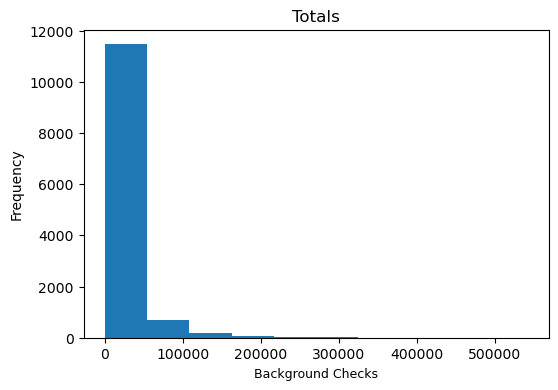

In [16]:
# Here we will explore the totals variable in the dataset for this question.

US_gun_bchecks_data['totals'].plot(kind='hist',figsize=(6,4))
plt.title('Totals')
plt.xlabel('Background Checks',fontsize=9);

In [17]:
# This function is for the grouping of variables depending on the type of group that will be needed and the
#    function will add up the total of all values in columns, depending on the group.

def group_by_(group):
    grouped_data = US_gun_bchecks_data.groupby(group).sum(numeric_only=True)
    return grouped_data

In [18]:
# Exploring the variable handgun and its comparison to the total number of background checks.

handgun_total = US_gun_bchecks_data['handgun'].sum()
checks_total = US_gun_bchecks_data['totals'].sum()

gun_types_comparison = {'handgun_total': [handgun_total], 'total_checks':[checks_total]}
pd.DataFrame(gun_types_comparison)

,handgun_total,total_checks
0,74053083.0,269622638.0


> The previous cell shows the totals of background checks for handguns and the sum of all background checks from 1998 to 2017. This data will be helpful in exploring further into question one. 

> In the next cell, the percentage of handgun checks to the total number of background checks will be calculated to help with exploration of the question.

In [19]:
# Calculating the handgun check percentage to total background checks to show how many of the background checks
#    are specifically for handguns.

handgun_percentage = (handgun_total / checks_total) * 100
handgun_percentage

27.465454514245945

> So from the total number of background checks from 1998 to 2017, about 27.5% of the checks were called in specifically for the sale of a handgun.

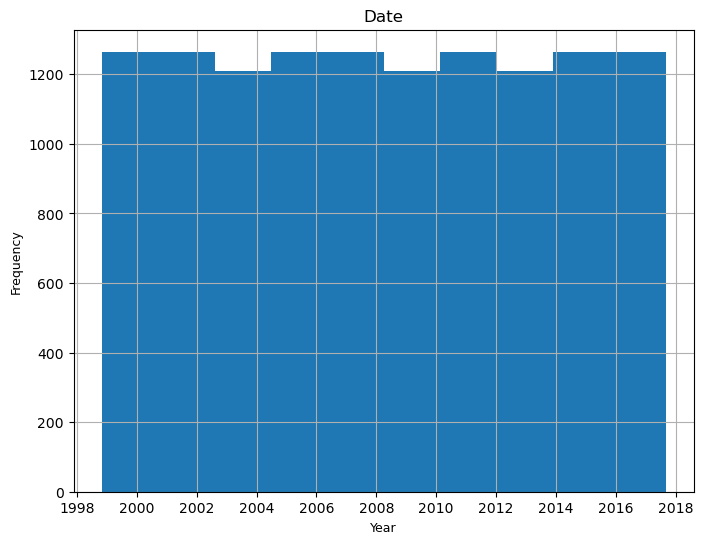

In [20]:
# Here we will explore the date variable in the dataset for this question.

US_gun_bchecks_data['date'].hist(figsize=(8,6))
plt.title('Date')
plt.xlabel('Year',fontsize=9)
plt.ylabel('Frequency',fontsize=9);

In [21]:
# Here we create a year column and group the dataset by year so that we can compare total background checks from
#    handgun background checks by year.

# Creating year column.
US_gun_bchecks_data['year'] = pd.DatetimeIndex(US_gun_bchecks_data['date']).year

# Grouping by year.
question_one_set_by_year = group_by_('year')

# Creating a total background checks by year variable and a total handguns checks by year variable.
totals_by_year = question_one_set_by_year['totals']
handguns_by_year = question_one_set_by_year['handgun']

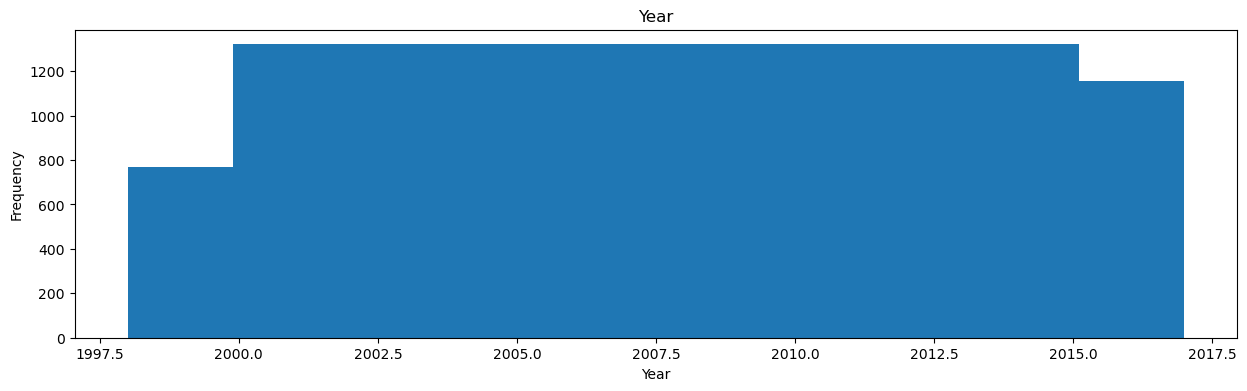

In [22]:
# Here we will explore the year variable in the dataset for this question.

US_gun_bchecks_data['year'].plot(kind='hist',figsize=(15,4))
plt.title('Year')
plt.xlabel('Year',fontsize=10);

,handgun
year,
1998,219999.0
1999,2536738.0
2000,2191879.0
2001,2167213.0
2002,1845112.0
2003,1851078.0
2004,1990460.0
2005,2241740.0
2006,2441325.0


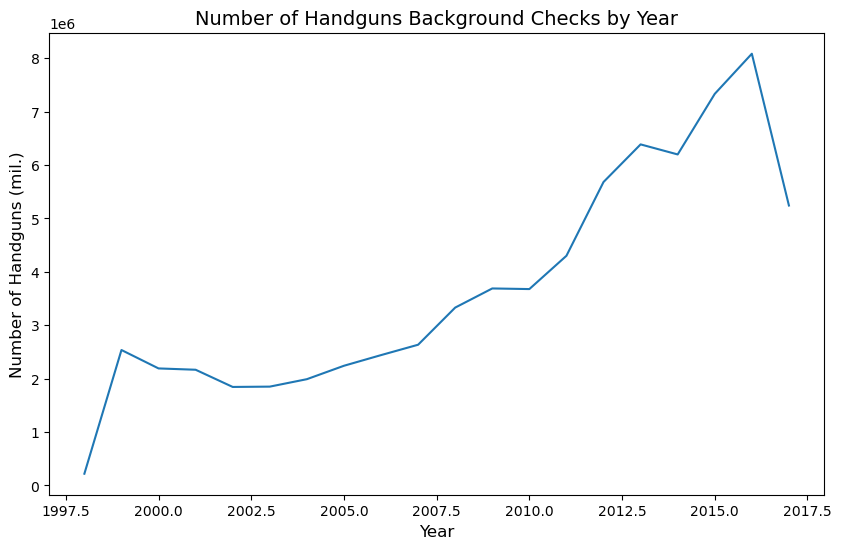

In [23]:
# With this question, my dataset needs to be grouped according to year, so I called the group_by_ function
#    to group my data by the date.

# Below I am creating a line graph
plt.figure(figsize=(10,6))

# Naming the x-axis title
plt.xlabel('Year', fontsize=12)

# Naming the y-axis title
plt.ylabel('Number of Handguns (mil.)', fontsize=12)

# Naming the graph title
plt.title('Number of Handguns Background Checks by Year', fontsize= 14)

# Plot of the grouped data on the graph
plt.plot(question_one_set_by_year['handgun']);

# Displaying the table of handgun checks by year.
US_gun_bchecks_data['year'] = pd.DatetimeIndex(US_gun_bchecks_data['date']).year
question_one_set_by_year = group_by_('year')
question_one_set_by_year[['handgun']]

> The year 2016 had the highest number of requests for background checks specifically for the purchase of handguns, while the years 2013 and 2017 come in second for the number of background checks.

> Now we will explore the comparison of the number of handgun purchase background checks and the total background checks from 1998 to 2017.

,handgun,totals
year,,
1998,219999.0,891898.0
1999,2536738.0,9043747.0
2000,2191879.0,8427096.0
2001,2167213.0,8820045.0
2002,1845112.0,8367069.0
2003,1851078.0,8402244.0
2004,1990460.0,8579891.0
2005,2241740.0,8867055.0
2006,2441325.0,9993057.0


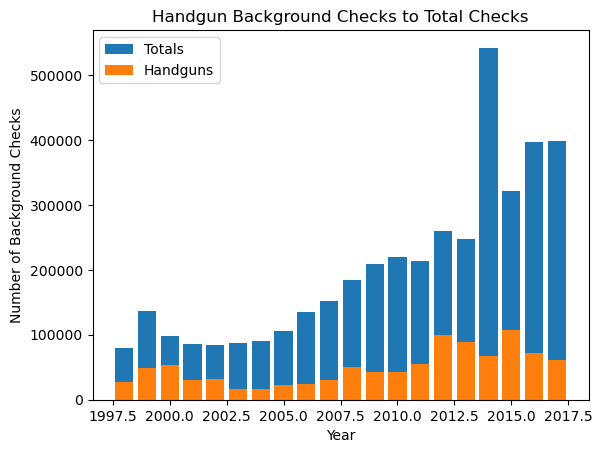

In [24]:
# Here we will create a bar graph that compares the handgun checks on top of the total background checks
#    per year.

# Creating the bar graph with two types of bars: totals and handguns.
plt.bar(x=US_gun_bchecks_data['year'], height=US_gun_bchecks_data['totals'], label='Totals')
plt.bar(x=US_gun_bchecks_data['year'], height=US_gun_bchecks_data['handgun'], label='Handguns')

# Naming the graph title.
plt.title('Handgun Background Checks to Total Checks', fontsize=12)

# Naming the x-axis title.
plt.xlabel('Year')

# Naming the y-axis title.
plt.ylabel('Number of Background Checks')

# Creating the legend.
plt.legend();

# Displaying the table of handgun checks and background checks per year.
question_one_set_by_year[['handgun','totals']]

> We can see that handgun checks were over half of the total background checks in the year 2000, but these specific checks have become lower in comparison to total background checks, which is especially evident in the year 2014.

### Question 2: What are the top 5 states in total background checks? How have they compared over the years?

> All single variables used in this question analysis from the dataset will be displayed in the cells below.

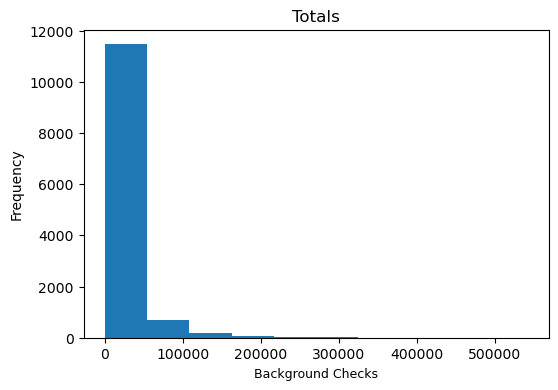

In [25]:
# Here we will explore the totals variable in the dataset for this question.

US_gun_bchecks_data['totals'].plot(kind='hist',figsize=(6,4))
plt.title('Totals')
plt.xlabel('Background Checks',fontsize=9);

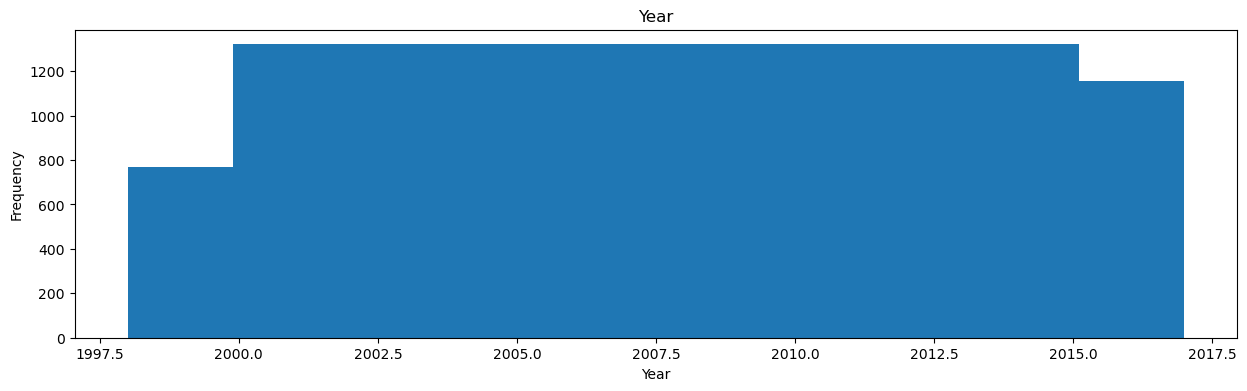

In [26]:
# Here we will explore the year variable in the dataset for this question.

US_gun_bchecks_data['year'].plot(kind='hist',figsize=(15,4))
plt.title('Year')
plt.xlabel('Year',fontsize=10);

In [27]:
# The following code determines the state max totals in background checks each year by index. This table
#    will show comparisons of each states over the years in terms of highest number of background checks by state
#    each year.

max_states = US_gun_bchecks_data.groupby('year')['totals'].idxmax()
US_gun_bchecks_data.loc[max_states][['state']]

,state
12421,Texas
11719,California
11059,California
10441,Texas
9781,Texas
9121,Texas
8461,Texas
7801,Texas
7113,Kentucky
6453,Kentucky


> The data above shows the recurrences of the top states in total background checks through the 20 years of the collection of the background check data. We can see that Kentucky has had the most background checks in total. The output is shown with the top state from 1998 at the top all the way down to the top state of the year 2017 at the bottom.

,totals
state,
North Carolina,541978.0
Kentucky,398706.0
California,298161.0
Texas,241791.0
Indiana,230892.0


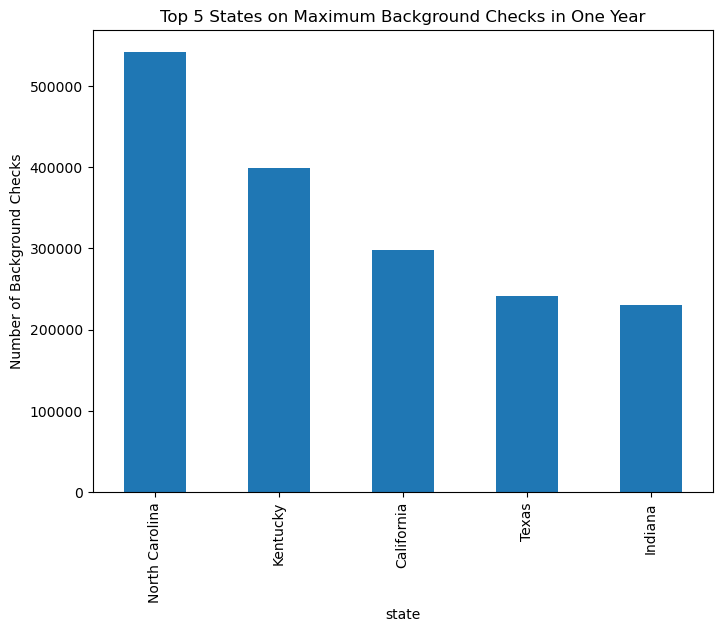

In [28]:
# Finding state with the highest total background checks number in one singular year.

# Creating figure size.
plt.figure(figsize=(8,6))

# Naming the title of the graph.
plt.title('Top 5 States on Maximum Background Checks in One Year', fontsize=12)

# Naming the x-axis title.
plt.xlabel('State')

# Naming the y-axis title.
plt.ylabel('Number of Background Checks')

# Plotting the data.
states_max = US_gun_bchecks_data.groupby('state').max()
states_max.sort_values('totals', ascending=False).groupby('year').head(5)['totals'].plot(kind='bar');

# Displaying states with highest background checks in one year.
states_max.sort_values('totals', ascending=False).groupby('year').head(5)[['totals']]

In [29]:
# Finding the year in which North Carolina had the highest total background checks through the index 
#    discovered previously.

US_gun_bchecks_data.iloc[[2345]][['year']]

,year
2345,2014


> Even though Kentucky has more years with the top total background checks spot, North Carolina had the one year of 2014, which we discovered in the cell directly above, where it's number of background checks topped all of the other states' one year totals. 

In [30]:
# The data is grouped according to each state by calling to the group_by_ function, then the top 5 states 
#    with the largest number of total background checks are shown.

question_two_set = group_by_('state')

# Finding top 5 states in total background checks.
question_two_set = question_two_set['totals'].nlargest(5)
question_two_set

state
Kentucky        29762434.0
Texas           19435186.0
California      19014063.0
Illinois        15471534.0
Pennsylvania    13133876.0
Name: totals, dtype: float64

> The top five states in total background checks are Kentucky leading, then Texas, California, Illinois, and Pennsylvania. Even though North Carolina has the highest number of total background checks in one year, it's sum of all background checks from 1998 to 2017 still did not help to make the state get in the top 5.

state
Kentucky        29762434.0
Texas           19435186.0
California      19014063.0
Illinois        15471534.0
Pennsylvania    13133876.0
Name: totals, dtype: float64

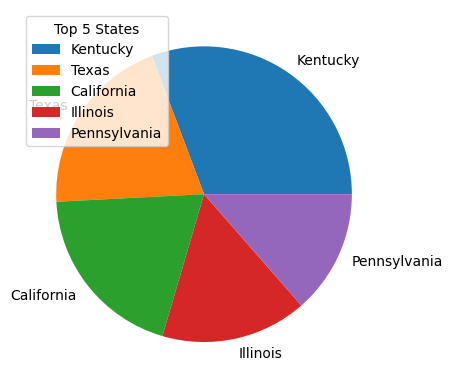

In [31]:
# Now we will create out chart based on the data discovered above to display it in a readable format.
label_names = ['Kentucky','Texas','California','Illinois','Pennsylvania']

# Creating pie chart.
plt.pie(question_two_set, labels=label_names)
plt.legend(title='Top 5 States', loc='upper left');

# Displaying the numeric values shown in the chart.
question_two_set

> We can see that Kentucky has the most amount of background checks from 1998 to 2017. With Texas following, then we have California, Illinois, and Pennsylvania.

### Question 3: Which state has the highest redemption rate checks on all weapons? 

> All single variables used in this question analysis from the dataset will be displayed in the cells below.

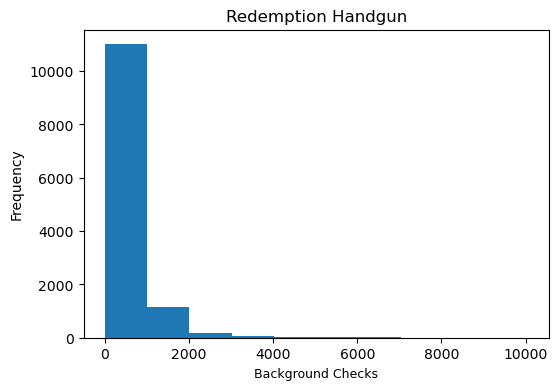

In [32]:
# Here we will explore the redemption handgun variable in the dataset for this question.

US_gun_bchecks_data['redemption_handgun'].plot(kind='hist',figsize=(6,4))
plt.title('Redemption Handgun')
plt.xlabel('Background Checks',fontsize=9);

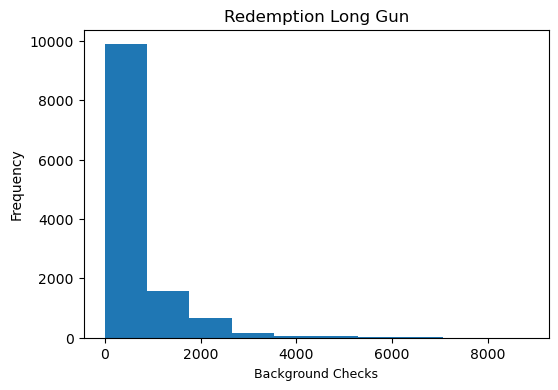

In [33]:
# Here we will explore the redemption long gun variable in the dataset for this question.

US_gun_bchecks_data['redemption_long_gun'].plot(kind='hist',figsize=(6,4))
plt.title('Redemption Long Gun')
plt.xlabel('Background Checks',fontsize=9);

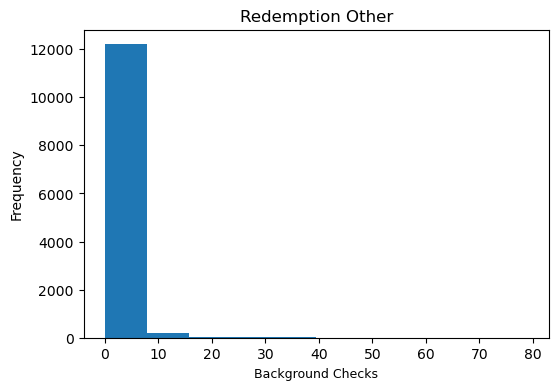

In [34]:
# Here we will explore the redemption other variable in the dataset for this question.

US_gun_bchecks_data['redemption_other'].plot(kind='hist',figsize=(6,4))
plt.title('Redemption Other')
plt.xlabel('Background Checks',fontsize=9);

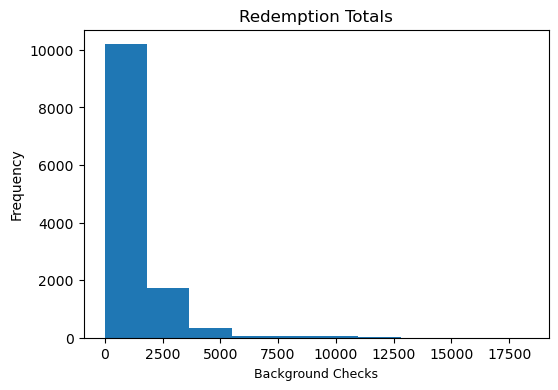

In [35]:
# Creating a column with the totals of redemption background checks.

redemption_columns = ['redemption_handgun','redemption_long_gun','redemption_other']
US_gun_bchecks_data['redemption_totals'] = US_gun_bchecks_data[redemption_columns].sum(axis=1)

# Here we will explore the redemption totals variable in the dataset for this question.

US_gun_bchecks_data['redemption_totals'].plot(kind='hist',figsize=(6,4))
plt.title('Redemption Totals')
plt.xlabel('Background Checks',fontsize=9);

In [36]:
# Creating a subset of the combination of redemption totals by state.
highest_redem_by_state = group_by_('state')
highest_redem_by_state = highest_redem_by_state[['redemption_totals']]

# Here we will display the 10 states with the largest redemption totals to find the top state.
highest_redem_by_state['redemption_totals'].nlargest(10)

state
Texas             1824135.0
North Carolina     702566.0
Kentucky           666652.0
Alabama            653892.0
Oklahoma           603296.0
Arkansas           519061.0
West Virginia      511076.0
Mississippi        477438.0
Georgia            470761.0
Missouri           403701.0
Name: redemption_totals, dtype: float64

> We can see from above that Texas is the top state in terms of highest redemption rate background checks from 1998 to 2017, with a total of 1,824,135 background checks specifically for redemption. 

In [37]:
# Here we will explore Texas' redemption check totals on the different types of weapons.

# Creating a subset grouped by state and displaying all of the columns on redemption checks.
highest_redem_by_state = group_by_('state')
highest_redem_by_state = highest_redem_by_state[['redemption_handgun','redemption_long_gun',
                                              'redemption_other','redemption_totals']]

# Displaying Texas' row with all of the redemption check numbers associated with the state.
highest_redem_by_state.loc[['Texas']]

,redemption_handgun,redemption_long_gun,redemption_other,redemption_totals
state,,,,
Texas,839409.0,982571.0,2155.0,1824135.0


> In the cell above, we can see that Texas has a redemption background check total of 1,824,135, with 839,409 of the total checks for handguns, 982,571 of the total checks for long guns, and 2,155 of the total checks for other.

redemption_handgun     839409.0
redemption_long_gun    982571.0
redemption_other         2155.0
Name: Texas, dtype: float64

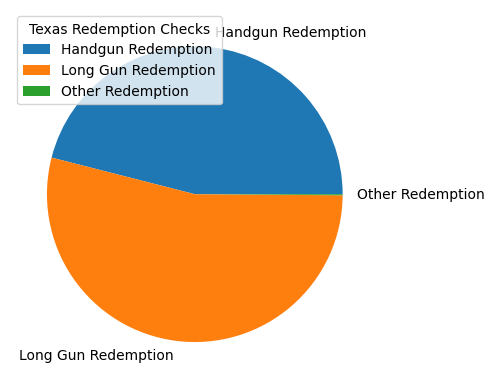

In [38]:
# Now we will graph these totals for the state of Texas for visualization.

highest_redem_by_state = highest_redem_by_state[['redemption_handgun','redemption_long_gun',
                                              'redemption_other']]

# Creating the pie chart specifically for the state of Texas.
label_names = ['Handgun Redemption', 'Long Gun Redemption', 'Other Redemption']
texas_redem = highest_redem_by_state.loc['Texas']
plt.pie(texas_redem, labels=label_names)
plt.legend(title='Texas Redemption Checks', loc='upper left');

# Displaying the numeric values shown in the chart.
texas_redem

> Above we can see how most of the redemption checks in Texas were mainly for long guns, with handgun redemptions closely following and a tiny fraction for other redemption background checks.

<a id='conclusions'></a>
## Conclusions

> **Question 1: What amount of the total background checks each year are from handguns?**
We discovered that about 27.5% of all total background checks that were specifically called into the FBI were for the transactions of handguns from 1998 to 2017. This is less than one-third of all total background checks. The year 2016 was the top year in terms of number of background checks for handguns. But in comparison to total background checks by year, in the year 2000 over half of the total background checks were for handguns. In the later years, the handgun checks to total background checks ratio has gone down significantly. Additional research could be helpful in comparing states that are more popular with hunting, since those states would more likely have more long gun background checks from sales and the ratio of handgun background checks would go down compared to states with less hunting.


> **Question 2: What are the top 5 states in total background checks? How have they compared over the years?**
The top five states in terms of total background checks in order from highest to lowest are Kentucky, Texas, California, Illinois, and Pennsylvania. Kentucky has the highest total background checks combined from the years 1998 to 2017 and the most amount of years as the top state in total background checks for each year. However, North Carolina is the top state in terms of highest number of total background checks in one year during the year of 2014. North Carolina, however, did not make the top five in total background checks from 1998 to 2017. Information on North Carolina's changes in gun transaction background check laws during the year 2014 would be very interesting to add to this analysis. It would also be helpful in finding the differences in the laws of the top five states background checking for gun sales.


> **Question 3: Which state has the highest redemption rate checks on all weapons?**
The top state in terms of redemption background checks from 1998 to 2017 is the state of Texas. The total redemption background checks in this time period for Texas is 1,824,135. The highest amount of redemption checks were for long guns, then handguns, and then other. Information on Texas' redemption regulations would be very helpful in finding out if Texas requires background checks for every redemption.


### Limitation
> The limitations to this analysis were that each state has its own laws on background checks and just by looking at this dataset, states cannot be compared equally in terms of number of background checks. It also cannot be inferred that certain states have more strict laws on background checks based only on this data. It has to be taken into account that some states have more gun sales or even populations in comparison to others. Another limitation is the collection of the data. This data was collected, for the most part, for public transactions. Some private transactions were checked, but not all private transactions are accounted for in this dataset since the FBI cannot keep track of all private sales of weapons. Therefore, in terms of completeness of data, this dataset is missing a big portion without most private sales recorded. The data is also not completely up to date, since the dataset has not been updated to show the past five years of data. This missing data could be helpful for a more complete analysis that is more up-to-date.

